# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates

# **Importing the Dataset**

In [ ]:
df = pd.read_csv("AQI.csv").sort_values(by=['City','Date'])#sorting by city and date.
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
365,Ahmedabad,1/1/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,Ahmedabad,1/1/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,NaN,NaN
1096,Ahmedabad,1/1/2018,84.46,NaN,7.58,87.62,48.40,NaN,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor
1461,Ahmedabad,1/1/2019,110.71,NaN,63.03,111.56,100.04,NaN,63.03,80.15,57.12,4.08,32.33,6.93,1474.0,Severe


# **Check Null Values**

In [ ]:
df.info() #Print a Concise Summary of Dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.8+ MB


In [ ]:
df.isnull().sum() #sum(count) of null values.

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# **Unique values and Count of columns**

In [ ]:
for i in df.columns:
    print('column name:{}     unique values:{}'.format(i,len(df[i].unique())))  #Finds all the Unique Values Within the df.

column name:City     unique values:26
column name:Date     unique values:2009
column name:PM2.5     unique values:11717
column name:PM10     unique values:12572
column name:NO     unique values:5777
column name:NO2     unique values:7405
column name:NOx     unique values:8157
column name:NH3     unique values:5923
column name:CO     unique values:1780
column name:SO2     unique values:4762
column name:O3     unique values:7700
column name:Benzene     unique values:1874
column name:Toluene     unique values:3609
column name:Xylene     unique values:1562
column name:AQI     unique values:830
column name:AQI_Bucket     unique values:7


In [ ]:
cities = df['City'].value_counts()   #Return a Series containing counts of unique values.
print(f'Total no. of different cities in the dataset : {len(cities)}')
print(cities.index)  #priting the unique values of column 'City'

Total no. of different cities in the dataset : 26
Index(['Chennai', 'Bengaluru', 'Lucknow', 'Delhi', 'Mumbai', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')


# **Filling Null Values**

In [ ]:
df['PM2.5']=df['PM2.5'].fillna(df['PM2.5'].mean())
df['PM10']=df['PM10'].fillna(df['PM10'].mean())
df['NO']=df['NO'].fillna(df['NO'].mean())
df['NO2']=df['NO2'].fillna(df['NO2'].mean())
df['NOx']=df['NOx'].fillna(df['NOx'].mean())
df['NH3']=df['NH3'].fillna(df['NH3'].mean())
df['CO']=df['CO'].fillna(df['CO'].mean())
df['SO2']=df['SO2'].fillna(df['SO2'].mean())
df['O3']=df['O3'].fillna(df['O3'].mean())
df['Benzene']=df['Benzene'].fillna(df['Benzene'].mean())
df['Toluene']=df['Toluene'].fillna(df['Toluene'].mean())
df['Xylene']=df['Xylene'].fillna(df['Xylene'].mean())
df['AQI']=df['AQI'].fillna(df['AQI'].mode()[0])
df['AQI_Bucket']=df['AQI_Bucket'].fillna('Moderate')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29234
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.8+ MB


# **Average Amount Of Pollution In Every City**

In [ ]:
df.describe()   #Generate descriptive statistics.

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,156.245369
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,131.194189
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,103.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
df.reset_index(drop=True,inplace=True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,67.450578,118.127103,0.92000,18.220000,17.150000,23.483476,0.920000,27.640000,133.36000,0.00000,0.020000,0.000000,102.0,Moderate
1,Ahmedabad,1/1/2016,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,3.28084,8.700972,3.070128,102.0,Moderate
2,Ahmedabad,1/1/2017,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,0.00000,0.000000,0.000000,102.0,Moderate
3,Ahmedabad,1/1/2018,84.460000,118.127103,7.58000,87.620000,48.400000,23.483476,7.580000,102.360000,69.02000,14.48000,45.600000,6.330000,278.0,Poor
4,Ahmedabad,1/1/2019,110.710000,118.127103,63.03000,111.560000,100.040000,23.483476,63.030000,80.150000,57.12000,4.08000,32.330000,6.930000,1474.0,Severe


# **Most Polluted cities**

In [ ]:
most_polluted = df[['City', 'AQI', 'PM10','PM2.5', 'CO','NO', 'NO2','SO2','O3']].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,PM2.5,CO,NO,NO2,SO2,O3
City,,,,,,,,
Ahmedabad,334.485814,117.409318,67.728234,16.147420,20.956815,49.805675,42.281148,37.565152
Delhi,258.703833,228.413747,117.146631,1.976053,38.964280,50.763057,15.826280,50.619826
Lucknow,211.276755,118.127103,107.568277,2.131976,15.261301,33.188450,10.095653,36.884892
Patna,210.979010,119.013316,113.815353,1.591700,30.283315,36.507494,21.293910,36.836527
Gurugram,208.550923,150.467320,112.549731,1.321857,17.537607,23.797951,9.952547,34.415042
Talcher,155.490811,156.552639,62.607920,1.911862,28.071044,17.343337,25.596562,20.362240
Jorapokhar,139.759624,142.240508,66.406088,1.358846,12.530220,13.781598,27.906317,32.943243
Guwahati,139.579681,116.604900,63.692929,0.738284,20.038456,13.598607,14.664127,25.089027
Brajrajnagar,138.699360,123.094114,64.726798,1.870288,17.372515,19.524152,10.760311,20.471759


## **Plotting graph of most polluted cities**

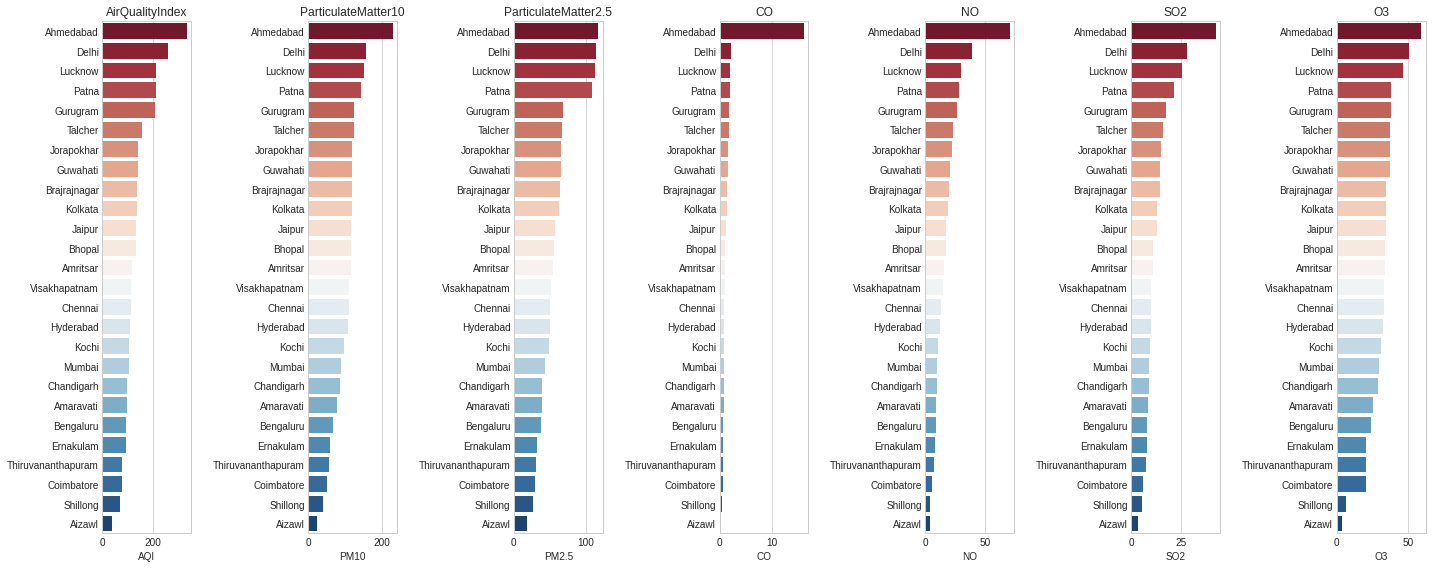

In [ ]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots(1,7, figsize = (20,8))
bar1=sns.barplot(x = most_polluted.AQI, y = most_polluted.index, palette='RdBu',ax=ax_[0]);
bar1=sns.barplot(x = most_polluted.sort_values(by="PM10",ascending=False)['PM10'] , y = most_polluted.index, palette='RdBu',ax=ax_[1]);
bar1=sns.barplot(x = most_polluted.sort_values(by="PM2.5",ascending=False)['PM2.5'] , y = most_polluted.index, palette='RdBu',ax=ax_[2]);
bar1=sns.barplot(x = most_polluted.sort_values(by='CO',ascending=False)['CO'], y = most_polluted.index, palette='RdBu',ax=ax_[3]);
bar1=sns.barplot(x = most_polluted.sort_values(by='NO',ascending=False)['NO'] , y = most_polluted.index, palette='RdBu',ax=ax_[4]);
bar1=sns.barplot(x = most_polluted.sort_values(by='SO2',ascending=False)['SO2'] , y = most_polluted.index, palette='RdBu',ax=ax_[5]);
bar1=sns.barplot(x = most_polluted.sort_values(by='O3',ascending=False)['O3'] , y = most_polluted.index, palette='RdBu',ax=ax_[6]);

titles = ['AirQualityIndex', 'ParticulateMatter10','ParticulateMatter2.5', 'CO', 'NO', 'SO2', 'O3']
for i in range(7) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 10);
    ax_[i].set_title(titles[i])
    f.tight_layout()

### Correlation

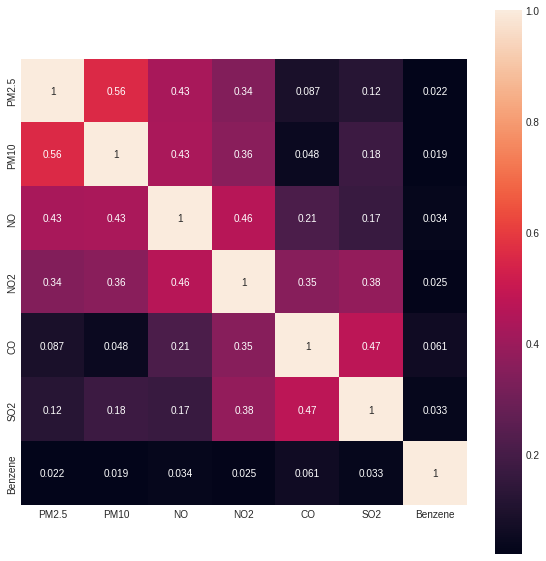

In [ ]:
cor = df.corr()
heatmap_df= cor.drop(['NOx', 'NH3','O3','Toluene','Xylene', 'AQI']).drop(['NOx', 'NH3','O3','Toluene','Xylene', 'AQI'], axis=1)
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(heatmap_df, vmax = 1, square = True, annot = True)

# **Graph of Pollutants in every City.**

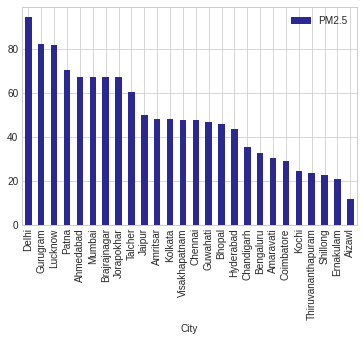

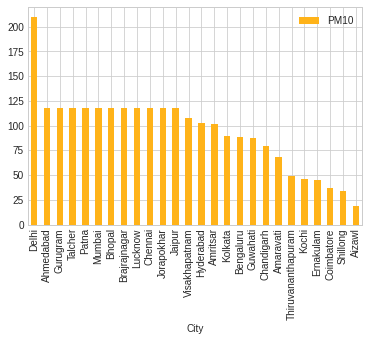

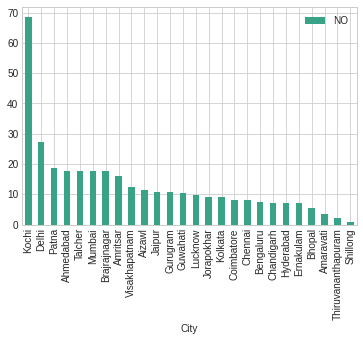

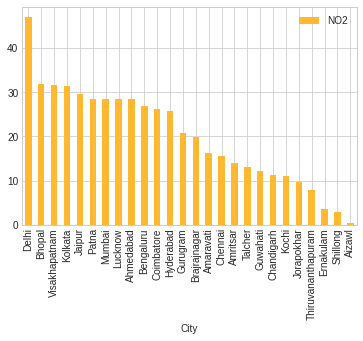

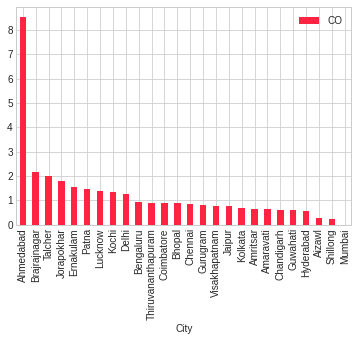

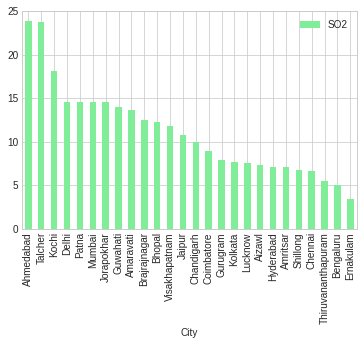

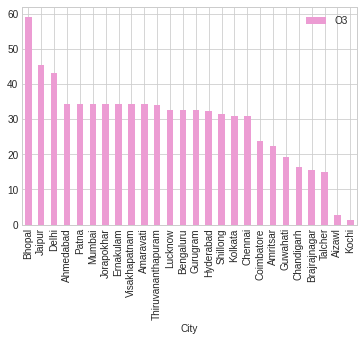

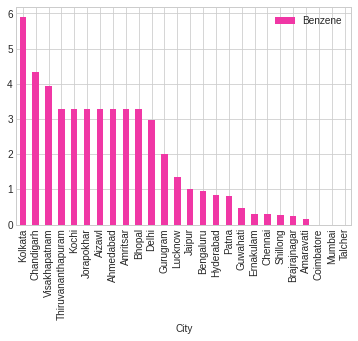

In [ ]:
df[['PM2.5','City']].groupby(['City']).median().sort_values("PM2.5", ascending = False).plot.bar(color='#2C2891')
df[['PM10','City']].groupby(['City']).median().sort_values("PM10", ascending = False).plot.bar(color='#FFB319')
df[['NO','City']].groupby(['City']).median().sort_values("NO", ascending = False).plot.bar(color='#39A388')
df[['NO2','City']].groupby(['City']).median().sort_values("NO2", ascending = False).plot.bar(color='#FFB830')
df[['CO','City']].groupby(['City']).median().sort_values("CO", ascending = False).plot.bar(color='#FF2442')
df[['SO2','City']].groupby(['City']).median().sort_values("SO2", ascending = False).plot.bar(color='#80ED99')
df[['O3','City']].groupby(['City']).median().sort_values("O3", ascending = False).plot.bar(color='#EC9CD3')
df[['Benzene','City']].groupby(['City']).median().sort_values("Benzene", ascending = False).plot.bar(color='#F037A5')

# **Analaysis of data using Time Series**

In [ ]:
# convert column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI'] #Creating a list for Pollutants

## Plotting the Color Map for Every Month throughout the years

Text(0, 0.5, 'Concentration per Cubic Meter')

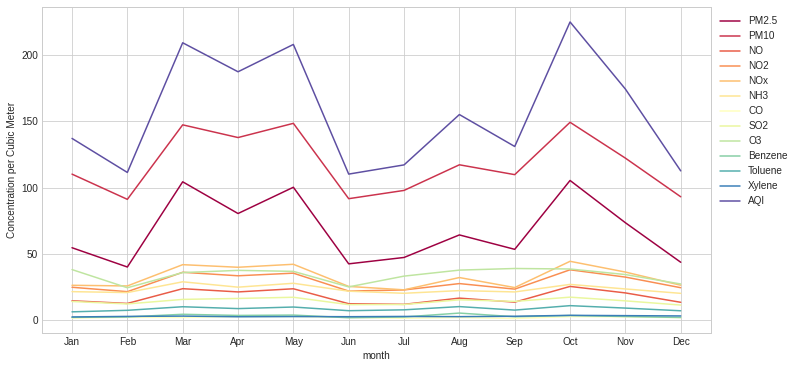

In [ ]:
df['month'] = pd.DatetimeIndex(df['Date']).month        #Returns Immutable ndarray-like of datetime64 data
mth_dic = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} #Creating a dict of months
df['month']=df['month'].map(mth_dic)              #Mapping of dict with index
df.groupby('month')[pollutants].mean().plot(figsize=(12,6), cmap='Spectral')    
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(np.arange(12), mth_dic.values())
plt.ylabel('Concentration per Cubic Meter')

# **Analysis of AQI during Covid 19 Pandemic of Major Cities**

In [ ]:
cities = ['Ahmedabad','Delhi','Bengaluru','Mumbai','Hyderabad','Chennai','Lucknow']  #Major Cities 
filter_city_date = df[df['Date'] >= '2019-01-01']
AQI = filter_city_date[filter_city_date.City.isin(cities)][['Date','City','AQI','AQI_Bucket']] #taking values only after 2019
AQI.head()

,Date,City,AQI,AQI_Bucket
4,2019-01-01,Ahmedabad,1474.0,Severe
5,2020-01-01,Ahmedabad,216.0,Poor
10,2019-01-10,Ahmedabad,661.0,Severe
11,2020-01-10,Ahmedabad,129.0,Moderate
16,2019-01-11,Ahmedabad,711.0,Severe


# Comparing AQI Before and After Lockdown using Line Graph

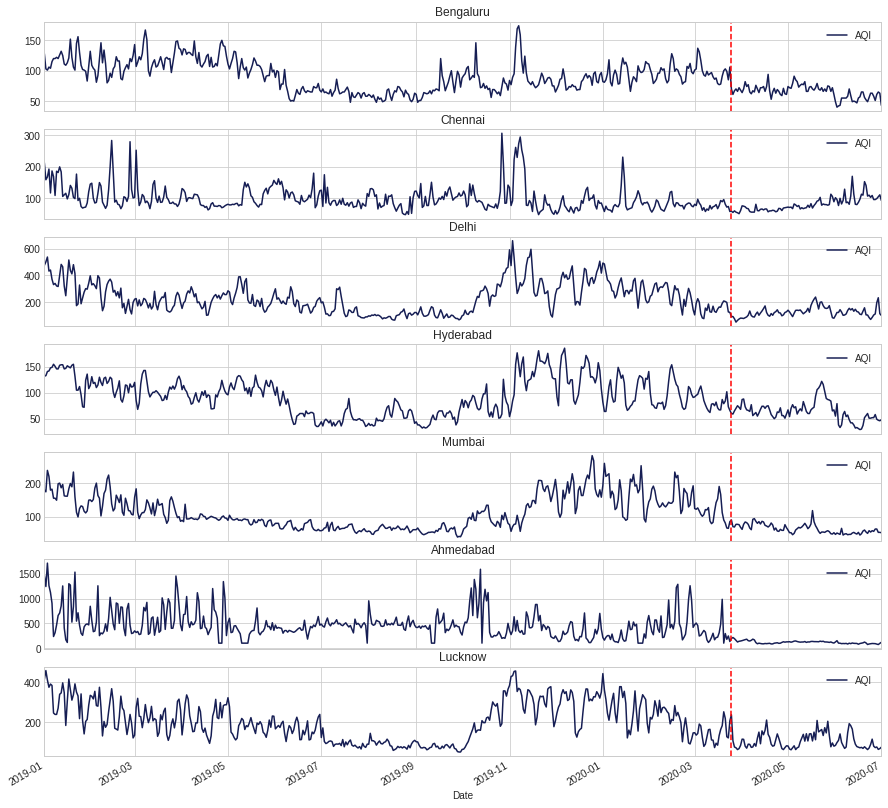

In [ ]:
subplot_titles=["Bengaluru","Chennai","Delhi",'Hyderabad','Mumbai', "Ahmedabad","Lucknow"]     #Create a figure and a set of subplots
x_line_annotation = datetime.date(2020, 3, 25)    #Lockdown Date
f, axes = plt.subplots(7, 1, figsize=(15, 15), sharex=True)       #Sharex controls sharing of properties among x or y axes
for count, title in enumerate(subplot_titles):
    ax = AQI[AQI['City']==title].plot(x='Date', y='AQI', kind='line', ax=axes[count], color='#161E54')
    ax.title.set_text(title)
    ax.set_xlim([datetime.date(2019, 1, 1), datetime.date(2020, 7, 1)])
    ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=1, color='#FF0000')

From Above Line Graphs we can conclude that:

-The Value Of Aqi gradually increases during January to May

-The Value Of Aqi gradually decreases during June to September

-But After the Lockdown, the value decreses drastically over the all major cities

# **Creating Pivot Tables**

In [ ]:
AQI_pivot = AQI.pivot(index='Date', columns='City', values='AQI')       #Pivot returns reshaped DataFrame
AQI_pivot.head()

City,Ahmedabad,Bengaluru,Chennai,Delhi,Hyderabad,Lucknow,Mumbai
Date,,,,,,,
2019-01-01,1474.0,128.0,212.0,475.0,132.0,413.0,181.0
2019-01-02,1246.0,103.0,158.0,501.0,133.0,457.0,175.0
2019-01-03,1719.0,101.0,167.0,537.0,141.0,410.0,239.0
2019-01-04,1264.0,106.0,192.0,432.0,142.0,374.0,221.0
2019-01-05,1127.0,104.0,116.0,440.0,148.0,390.0,180.0


In [ ]:
AQI_beforeLockdown = AQI_pivot['2020-01-01':'2020-03-25']
AQI_afterLockdown = AQI_pivot['2020-03-26':'2020-07-01']
df1= pd.DataFrame(AQI_beforeLockdown.mean().reset_index())
df2= pd.DataFrame(AQI_afterLockdown.mean().reset_index())
df3=df1.merge(df2, on='City')
df3 = df3.rename({'0_x': 'BeforeLockdown', '0_y': 'AfterLockdown'}, axis=1)

## **Bar Plot for Comparision**

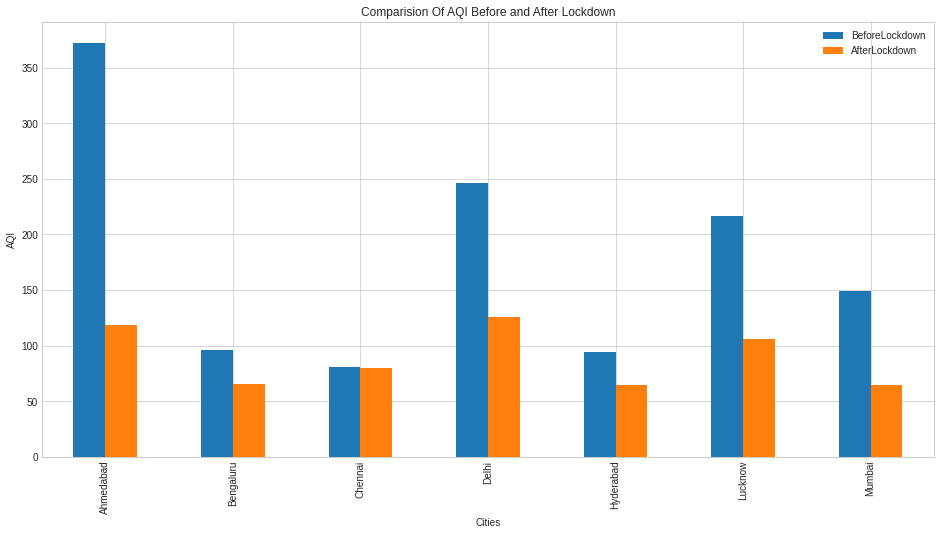

In [ ]:
df3.reset_index().plot(x="City", y=["BeforeLockdown", "AfterLockdown"], kind="bar",figsize=(16,8))
plt.title("Comparision Of AQI Before and After Lockdown")
plt.xlabel("Cities")
plt.ylabel("AQI")
plt.show()

-The mean AQI value for Mumbai went from moderate(148.77) to satisfactory(64.35)

-The mean AQI value for Ahmedabad went from very poor(372.4) to moderate(118.8)

-The mean AQI value for Delhi went from poor(246.3) to moderate(125.27)

-The mean AQI value for Hyderabad went from moderate(94.43) to satisfactory(64.67)

-The mean AQI value for Bengaluru went from moderate(96) to satisfactory(65.4)

-The mean AQI value for Chennai went from moderate(80.31) to satisfactory(80.1)




**Creating a copy of dataframe**


In [ ]:
df_cpy=df.copy()
sub_set=df_cpy[df_cpy['City'].isin(['Ahmedabad','Delhi','Mumbai','Chennai','Hyderabad','Lucknow'])]

In [ ]:
sub_set.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92000,18.220000,17.150000,23.483476,0.920000,27.640000,133.36000,0.00000,0.020000,0.000000,102.0,Moderate,Jan
1,Ahmedabad,2016-01-01,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,3.28084,8.700972,3.070128,102.0,Moderate,Jan
2,Ahmedabad,2017-01-01,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.49143,0.00000,0.000000,0.000000,102.0,Moderate,Jan
3,Ahmedabad,2018-01-01,84.460000,118.127103,7.58000,87.620000,48.400000,23.483476,7.580000,102.360000,69.02000,14.48000,45.600000,6.330000,278.0,Poor,Jan
4,Ahmedabad,2019-01-01,110.710000,118.127103,63.03000,111.560000,100.040000,23.483476,63.030000,80.150000,57.12000,4.08000,32.330000,6.930000,1474.0,Severe,Jan


In [ ]:
sub_set.groupby('City')['AQI_Bucket'].value_counts().to_frame()   #Creating a dataframe

AQI_Bucket
City      AQI_Bucket              
Ahmedabad Moderate             873
          Severe               638
          Poor                 238
          Very Poor            216
          Satisfactory          43
          Good                   1
Chennai   Satisfactory         941
          Moderate             929
          Poor                 110
          Good                  12
          Very Poor             11
          Severe                 6
Delhi     Poor                 542
          Moderate             529
          Very Poor            520
          Severe               239
          Satisfactory         158
          Good                  21
Hyderabad Moderate            1084
          Satisfactory         710
          Good                 141
          Poor                  54
          Very Poor             10
          Severe                 7
Lucknow   Moderate             694
          Very Poor            473
          Satisfactory         365
          Poor                 352
          Severe               110
          Good                  15
Mumbai    Moderate            1519
          Satisfactory         428
          Poor                  35
          Good                  26
          Very Poor              1

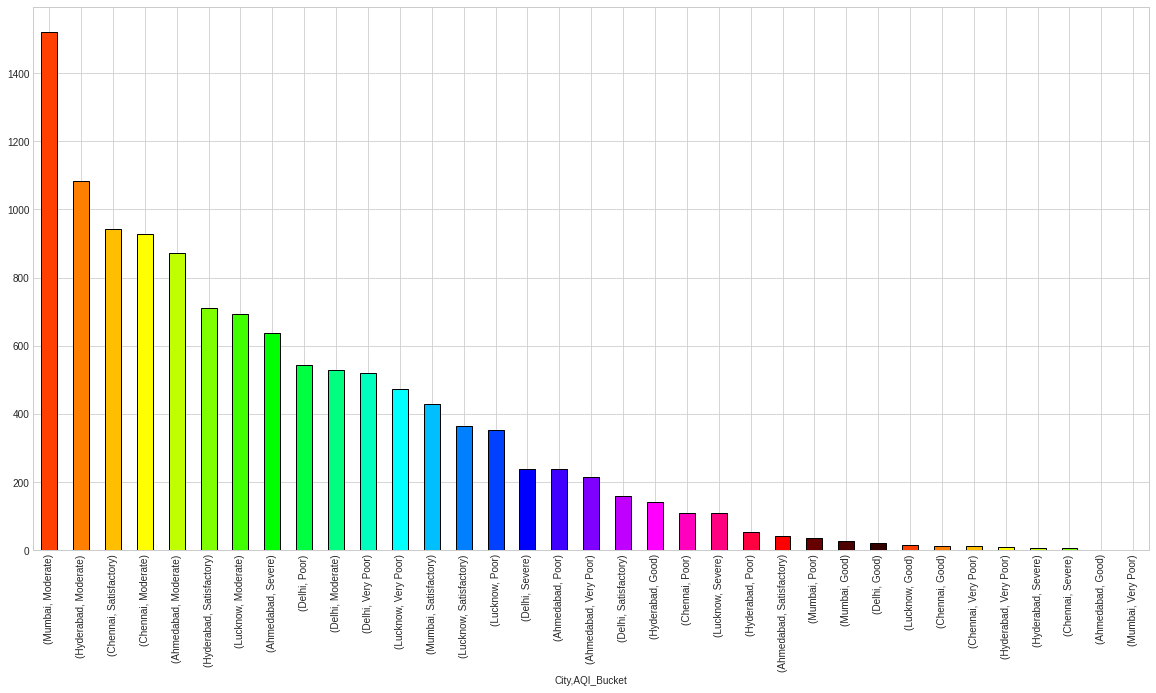

In [ ]:
plt.figure(figsize=(20,10))
sub_set.groupby('City')['AQI_Bucket'].value_counts().sort_values(ascending=False).plot.bar(color=['#ff4000','#ff8000','#ffbf00','#ffff00','#bfff00','#80ff00','#40ff00','#00ff00','#00ff40','#00ff80','#00ffbf','#00ffff','#00bfff','#0080ff','#0040ff','#0000ff','#4000ff','#8000ff','#bf00ff','#ff00ff','#ff00bf','#ff0080','#ff0040','#ff0000','#660000','#4d0000','#330000'],edgecolor='black')
plt.show()

In [ ]:
list=['Good','Moderate','Satisfactory','Poor','Very Poor','Severe']

([<matplotlib.patches.Wedge at 0x7fdea4c6f3d0>,
 [Text(0.14648365529584692, 1.090202980518384, 'Moderate'),
  Text(-0.9030187349109592, -0.6281378546145829, 'Satisfactory'),
  Text(0.22684442834538193, -1.0763557057630424, 'Poor'),
  Text(0.7515555545124892, -0.8032211703394184, 'Very Poor'),
  Text(1.0010785557733146, -0.4558966167573687, 'Good'),
  Text(1.0888753883698952, -0.15604611050042272, 'Severe')],
 [Text(0.0799001756159165, 0.5946561711918457, '45.7%'),
  Text(-0.49255567358779584, -0.3426206479715907, '27.8%'),
  Text(0.1237333245520265, -0.5871031122343867, '9.4%'),
  Text(0.4099393933704486, -0.4381206383669555, '7.9%'),
  Text(0.5460428486036261, -0.24867088186765562, '4.5%'),
  Text(0.5939320300199428, -0.08511606027295783, '4.5%')])

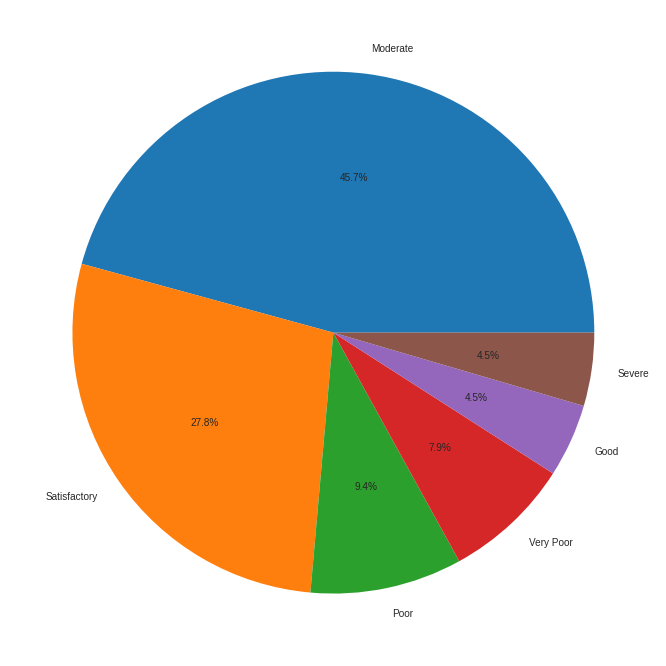

In [ ]:
plt.figure(figsize=(12,12))
plt.pie(df_cpy['AQI_Bucket'].value_counts()
[0:6],labels=(df_cpy['AQI_Bucket'].value_counts()
[0:6].keys()),autopct='%0.1f%%')

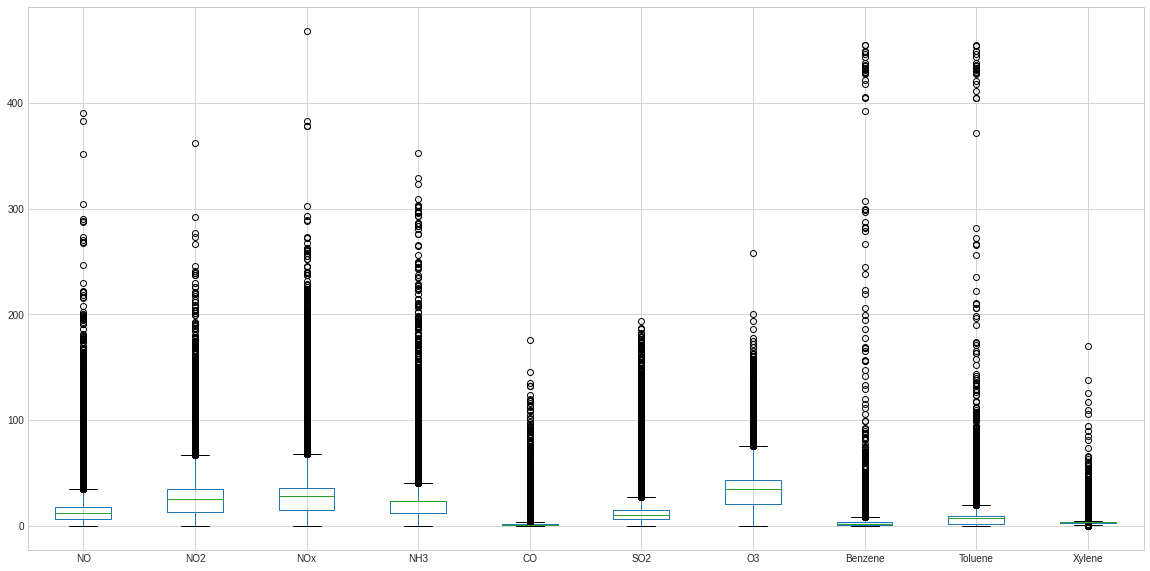

In [ ]:
plt.figure(figsize=(20,10))
pollutants1 = ['NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
df_cpy.boxplot(pollutants1)